In [54]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from random import random

In [2]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
y = [i/2 + random() * 2 for i in range(15)]
y

[1.9950767387618653,
 1.7500776315706843,
 2.643509357990177,
 1.8354311603617754,
 3.554288586348105,
 4.092375250452287,
 4.298806012741055,
 5.14514649862845,
 5.533907635699555,
 5.521775010158724,
 6.996599726601527,
 5.806357556111041,
 6.587570969878493,
 7.505052423652658,
 7.722232032981225]

Algeria
[27, 28, 30, 31, 32, 33, 34, 35, 36, 39, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]


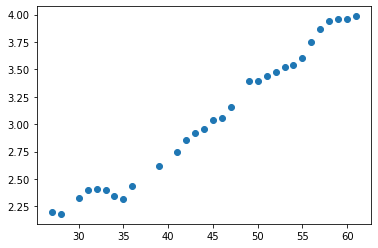

In [55]:
data = pd.read_csv("../clean_data/school_enrollment_tertiary.csv")
series = data.iloc[39]
print(series["Country Name"])
values = list(series.drop(["Unnamed: 0", "Country Name", "Country Code", "Unnamed: 67"]))
x, y = [], []

for indx, val in enumerate(values):
    if pd.isna(val): continue
    if True: y.append(np.log(val))
    else: y.append(val)
    x.append(indx)
print(x)

plt.scatter(x, y)
plt.show()

In [56]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

In [60]:
def confidence_intervals(x, y, slope, intercept, alpha=0.0005):
    n = len(x)
    t_value = stats.t.ppf(1 - alpha / 2, n - 2)
    prediction = slope * np.array(x) + intercept
    residuals = np.array(y) - prediction
    mse = np.sum(residuals**2) / (n - 2)
    x_mean = np.mean(x)
    x_var = np.var(x, ddof=1)
    conf_interval = t_value * np.sqrt(mse * (1 / n + (x - x_mean)**2 / ((n - 1) * x_var)))
    return prediction, conf_interval

In [61]:
predictions, conf_intervals = confidence_intervals(x, y, slope, intercept)
print(conf_intervals)

[0.12545438 0.12023997 0.11007187 0.10514338 0.1003391  0.09567772
 0.09118118 0.08687506 0.08278909 0.07221661 0.06700859 0.0650987
 0.06371043 0.06287834 0.0626246  0.0629562  0.06386404 0.06730041
 0.06974915 0.07262252 0.07587229 0.0794523  0.08331999 0.08743718
 0.09177031 0.09629023 0.10097185 0.10579371 0.11073749 0.11578759]


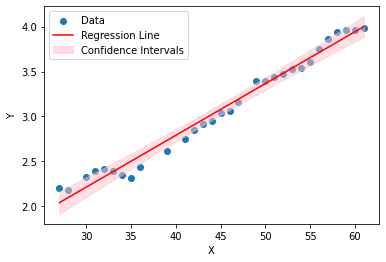

In [62]:
plt.scatter(x, y, label='Data')
plt.plot(x, predictions, color='red', label='Regression Line')
plt.fill_between(x, predictions - conf_intervals, predictions + conf_intervals, color='pink', alpha=0.5, label='Confidence Intervals')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()